In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL 
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

import pathlib

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [61]:
file_loc = "gdrive/My Drive/vehicles_images_new"
##file_loc = "gdrive/My Drive/animal_photos"
test_loc = "gdrive/My Drive/IMAGE_DATASET"

In [62]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(file_loc, validation_split=0.2,subset="training",seed=123,
                                                               image_size= (img_height,img_width),batch_size=batch_size)

Found 4378 files belonging to 4 classes.
Using 3503 files for training.


In [63]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(file_loc,validation_split=0.2,subset="validation",seed=123,
                                                             image_size=(img_height,img_width),batch_size=batch_size)

Found 4378 files belonging to 4 classes.
Using 875 files for validation.


In [64]:
class_names = train_ds.class_names
print(class_names)

['bus', 'motorcycle', 'plane', 'train']


In [65]:
AUTOTUNE =tf.data.AUTOTUNE

In [66]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [67]:
normalization_layer =layers.experimental.preprocessing.Rescaling(1./255) 

In [68]:
normalization_ds = train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalization_ds)) 

In [69]:
first_image = image_batch[0] 

In [70]:
# Notice the pixels values are now in [0,1] 
print(np.min(first_image),np.max(first_image))

0.003921569 0.9767975


In [71]:
num_classes = 4

**MODEL WITH MAXPOOLLING MECHANISM**

* 7 HIDDEN LAYER 
* MAXPOOLING 
* PADDING = SAME
* LOSS FUNCTION = sparse_categorical
* OPTIMIZER = ADAM

In [72]:
model1 = Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                    layers.Conv2D(16,3,padding="same",activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding="same",activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding="same",activation="relu"),
                    layers.MaxPooling2D(), 
                    layers.Flatten(),
                    layers.Dense(128,activation="relu"),
                    layers.Dense(num_classes)]) 

In [73]:
model1.compile(optimizer="Adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 45, 45, 64)       

In [74]:
tf.keras.layers.Conv2D(filters=4,kernel_size=(5,5),strides=(1,1),padding="valid",data_format=None,dilation_rate=(1,1),groups=1,
                       activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",
                       kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,
                       bias_constraint=None)

In [75]:
%%time
epochs = 15
history= model1.fit(train_ds,validation_data=val_ds,epochs=epochs)

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_accuracy"]
epochs_range =range(epochs)

Epoch 1/15
110/110 [==============================] - 9s 80ms/step - loss: 1.3526 - accuracy: 0.3962 - val_loss: 1.2217 - val_accuracy: 0.4640
Epoch 2/15
110/110 [==============================] - 5s 44ms/step - loss: 1.0661 - accuracy: 0.5524 - val_loss: 1.0823 - val_accuracy: 0.5897
Epoch 3/15
110/110 [==============================] - 5s 43ms/step - loss: 0.9338 - accuracy: 0.6160 - val_loss: 1.0715 - val_accuracy: 0.5863
Epoch 4/15
110/110 [==============================] - 5s 43ms/step - loss: 0.7720 - accuracy: 0.6925 - val_loss: 0.9846 - val_accuracy: 0.6171
Epoch 5/15
110/110 [==============================] - 5s 44ms/step - loss: 0.5940 - accuracy: 0.7790 - val_loss: 1.1451 - val_accuracy: 0.5874
Epoch 6/15
110/110 [==============================] - 5s 43ms/step - loss: 0.4396 - accuracy: 0.8444 - val_loss: 1.2442 - val_accuracy: 0.5897
Epoch 7/15
110/110 [==============================] - 5s 43ms/step - loss: 0.3024 - accuracy: 0.9047 - val_loss: 1.4730 - val_accuracy: 0.5783

**Vidation loss increase after some epoch and validation accuracy decrase, some modification need to be done on the model**

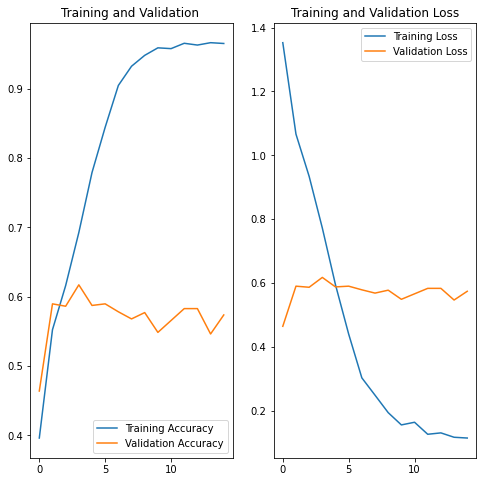

In [76]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation ")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

**MODEL EVALUATE**
* Time requires is 11ms/step

In [77]:
model1.evaluate(val_ds) 

28/28 [==============================] - 1s 18ms/step - loss: 1.8092 - accuracy: 0.5737


[1.809226155281067, 0.5737142562866211]

(32, 180, 180, 3)
(32,)


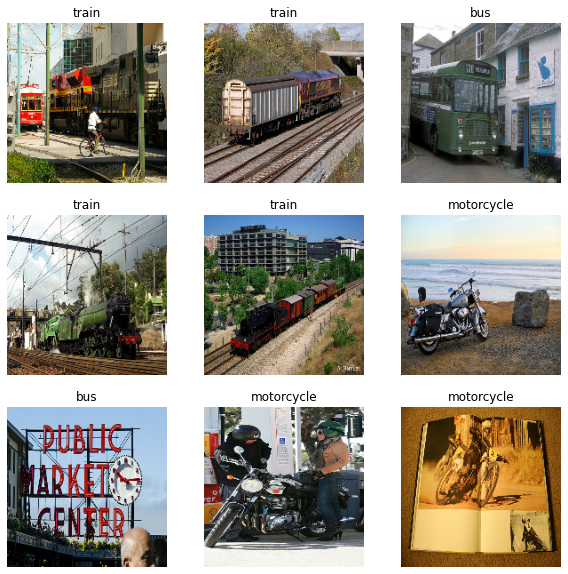

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

**THERE IS OCCURENCE OF OVERFITTING WHEN THE VALIDATION ACCURACY START TO DECREASE, THIS NOTIFY THAT OUR MODEL HAS MEMORIZE SOME OF THE IMAGE, HENCE OVERFITTING OCCURE. DATA AUGEMENTATION IS PROCESS OF SUPPLYING OUR MODEL MORE DATA THROUGH FLIPPING AND ROTATING OF EXISTING DATA TO REDUCE OVERFITTING OF THE MODEL.**

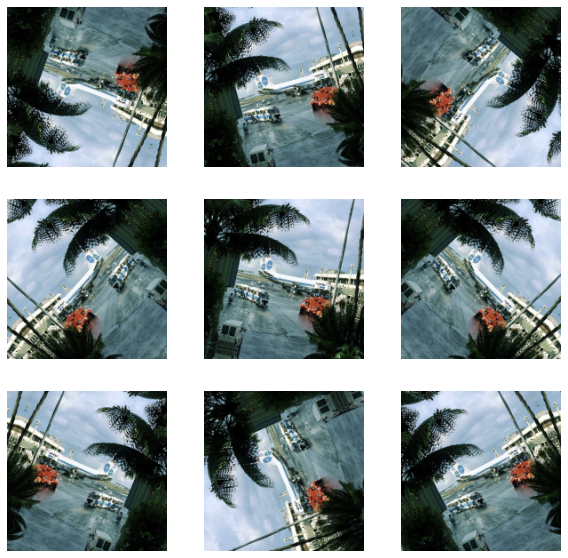

In [79]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                         tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
                                         tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)])

for image, _ in train_ds.take(1):
  plt.figure(figsize=(10,10))
  first_image = image[0]
  for i in range(9):
    ax=plt.subplot(3,3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image,0))
    plt.imshow(augmented_image[0]/255)
    plt.axis("off")

**MODEL WITH AVERAGEPOOLLING MECHANISM**

* 7 HIDDEN LAYER 
* MAXPOOLING 
* PADDING = SAME
* LOSS FUNCTION = sparse_categorical
* OPTIMIZER = ADAM

In [80]:
# model1 = Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
#                     layers.Conv2D(16,3,padding="same",activation="relu"),
#                     layers.AveragePooling2D(),
#                     layers.Conv2D(32,3,padding="same",activation="relu"),
#                     layers.AveragePooling2D(),
#                     layers.Conv2D(64,3,padding="same",activation="relu"),
#                     layers.AveragePooling2D(), 
#                     layers.Flatten(),
#                     layers.Dense(128,activation="relu"),
#                     layers.Dense(num_classes)]) 

In [81]:
# model1.compile(optimizer="adam",
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=["accuracy"])

# model1.summary()

In [82]:
# tf.keras.layers.Conv2D(filters=4,kernel_size=(5,5),strides=(1,1),padding="valid",data_format=None,dilation_rate=(1,1),groups=1,
#                        activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",
#                        kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,
#                        bias_constraint=None)

In [83]:
# %%time 
# epochs = 15
# history= model1.fit(train_ds,validation_data=val_ds,epochs=epochs)

# acc = history.history["accuracy"]
# val_acc = history.history["val_accuracy"]
 
# loss = history.history["loss"]
# val_loss = history.history["val_accuracy"]
# epochs_range =range(epochs)

In [84]:
# plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
# plt.plot(epochs_range,acc,label="Training Accuracy")
# plt.plot(epochs_range,val_acc,label="Validation Accuracy")
# plt.legend(loc="lower right")
# plt.title("Training and Validation ")

# plt.subplot(1,2,2)
# plt.plot(epochs_range,loss,label="Training Loss")
# plt.plot(epochs_range,val_loss,label="Validation Loss")
# plt.legend(loc="upper right")
# plt.title("Training and Validation Loss")
# plt.show()

**FEEDING THE INPUT WITH DATA THAT IS AUGMENTED TO REDUCE OVERFITTING OF THE MODEL**

In [85]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)


x= layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))(x)
x = layers.Conv2D(16,3,padding="same",activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32,3,padding="same",activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64,3,padding="same",activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(128,activation="relu")(x)
layers.Dense(num_classes)
model1 = keras.Model(inputs=inputs, outputs=output) 
model1.compile(loss="SparseCategoricalCrossentropy",optimizer="adam",metrics=["accuracy"])
model1.summary() 

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                           

In [86]:
%%time
epochs=15
history = model1.fit(train_ds,validation_data=val_ds,epochs=epochs)

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"] 
val_loss = history.history["val_loss"]

Epoch 1/15
110/110 [==============================] - 6s 50ms/step - loss: 4.9354 - accuracy: 0.2412 - val_loss: 4.8520 - val_accuracy: 0.2171
Epoch 2/15
110/110 [==============================] - 5s 48ms/step - loss: 4.8520 - accuracy: 0.2421 - val_loss: 4.8520 - val_accuracy: 0.2171
Epoch 3/15
110/110 [==============================] - 5s 48ms/step - loss: 4.8520 - accuracy: 0.2421 - val_loss: 4.8520 - val_accuracy: 0.2171
Epoch 4/15
110/110 [==============================] - 5s 48ms/step - loss: 4.8520 - accuracy: 0.2421 - val_loss: 4.8520 - val_accuracy: 0.2171
Epoch 5/15
110/110 [==============================] - 5s 49ms/step - loss: 4.8520 - accuracy: 0.2421 - val_loss: 4.8520 - val_accuracy: 0.2171
Epoch 6/15
110/110 [==============================] - 5s 48ms/step - loss: 4.8520 - accuracy: 0.2421 - val_loss: 4.8520 - val_accuracy: 0.2171
Epoch 7/15
110/110 [==============================] - 5s 48ms/step - loss: 4.8520 - accuracy: 0.2421 - val_loss: 4.8520 - val_accuracy: 0.2171

**MODEL EVALUATION**

In [87]:
model1.evaluate(val_ds) 

28/28 [==============================] - 1s 19ms/step - loss: 4.8520 - accuracy: 0.2171


[4.852029800415039, 0.21714285016059875]

**DATA AUGMENTATION HAS REALLY IMPROVED THE MODEL AND EVALUATION**

**PLOTTING GRAPHS**




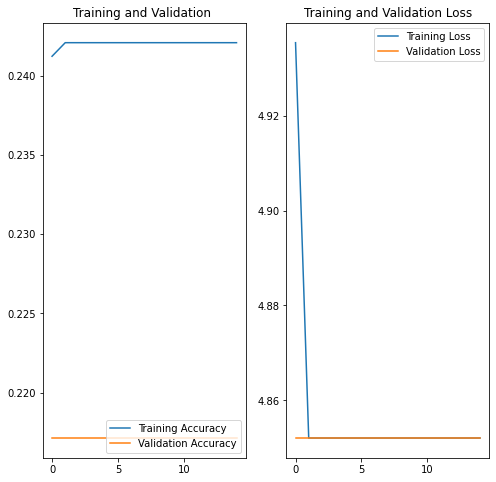

In [88]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation ")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

**TRANSFER LEARNING FROM MOBILEV2**
* PRETRAINED DATA
* Features Extractor

* RESIZING THE IMAGE

In [89]:
img_width = 160
img_height = 160
IMG_SHAPE = (img_width, img_height) + (3,)

In [90]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(file_loc,validation_split=0.2,batch_size=32,image_size=(160,160),
                                                               subset="training",seed=123)

Found 4378 files belonging to 4 classes.
Using 3503 files for training.


In [91]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(file_loc,validation_split=0.2,subset="validation",seed=123,
                                                             batch_size=32,image_size=(160,160))

Found 4378 files belonging to 4 classes.
Using 875 files for validation.


**IMPORTING THE BASE MODEL TO DEPLOY**

In [92]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights="imagenet")

In [93]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [94]:
base_model.trainable = False
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(4)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_6[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [95]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [96]:
inputs = tf.keras.Input(shape=(img_width, img_height, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model2 = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

len(model2.trainable_variables)

initial_epochs = 15

loss0, accuracy0 = model2.evaluate(val_ds)
print('initial loss: {:.2f}'.format(loss0))
print('initial accuracy: {:.2f}'.format(accuracy0))

history2 = model2.fit(train_ds, epochs=initial_epochs, validation_data=val_ds)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, None, None, 3)     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

**Time requires is 101ms/step**

In [97]:
model2.evaluate(val_ds) 

28/28 [==============================] - 5s 140ms/step - loss: 0.5040 - accuracy: 0.8160


[0.5040345788002014, 0.8159999847412109]

In [98]:
acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]

loss = history2.history["loss"]
val_loss = history2.history["val_loss"]

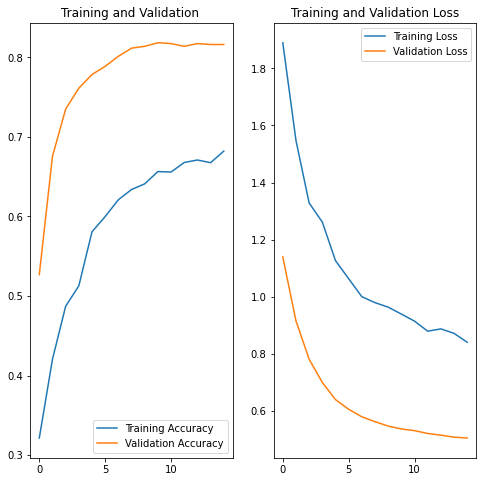

In [99]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation ")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

**FINE TUNNING THE PRE-TRAINED MODEL FROM MOBILENETV2**

In [100]:
base_model.trainable = True
base_model.summary()

print('Number of layers in the base model: ',len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_6[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [101]:
base_learning_rate = 0.0001
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

In [102]:
%%time
initial_epochs = 15
fine_tune_epochs = 15
total_epochs = initial_epochs + fine_tune_epochs
history_fine = model2.fit(train_ds, epochs=total_epochs, 
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds) 

Epoch 15/30
110/110 [==============================] - 33s 230ms/step - loss: 0.7908 - accuracy: 0.6820 - val_loss: 0.4951 - val_accuracy: 0.8217
Epoch 16/30
110/110 [==============================] - 26s 226ms/step - loss: 0.7260 - accuracy: 0.7157 - val_loss: 0.4886 - val_accuracy: 0.8229
Epoch 17/30
110/110 [==============================] - 25s 214ms/step - loss: 0.6809 - accuracy: 0.7308 - val_loss: 0.4744 - val_accuracy: 0.8217
Epoch 18/30
110/110 [==============================] - 25s 220ms/step - loss: 0.6578 - accuracy: 0.7337 - val_loss: 0.4701 - val_accuracy: 0.8274
Epoch 19/30
110/110 [==============================] - 25s 215ms/step - loss: 0.6171 - accuracy: 0.7485 - val_loss: 0.4657 - val_accuracy: 0.8263
Epoch 20/30
110/110 [==============================] - 24s 212ms/step - loss: 0.6069 - accuracy: 0.7545 - val_loss: 0.4681 - val_accuracy: 0.8286
Epoch 21/30
110/110 [==============================] - 25s 219ms/step - loss: 0.5936 - accuracy: 0.7639 - val_loss: 0.4815 -

In [103]:
model2.evaluate(val_ds) 

28/28 [==============================] - 5s 140ms/step - loss: 0.4987 - accuracy: 0.8171


[0.498740553855896, 0.8171428442001343]

**PLOTTING GRAPH FOR THE FINE TUNE MODEL OF PRE-TRAINED MODEL**

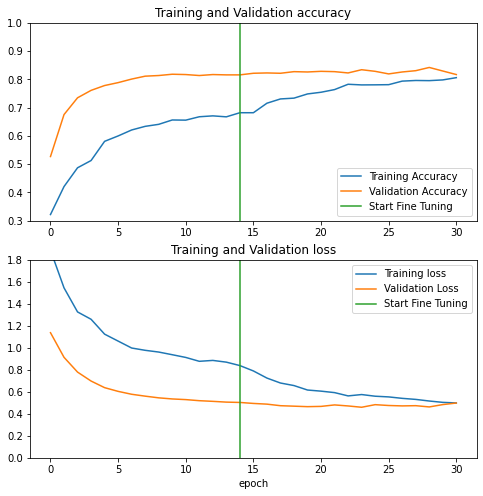

In [104]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim(0.3, 1)
plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim(0, 1.8)
plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.xlabel('epoch')
plt.show()

**NOW ITS TIME TO SAVE THE MODEL AS I AM SATISFIED WITH THE EVALUATION**

In [105]:
model2.save('gdrive/My Drive/computer-vision', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [106]:
computer_vision_model = keras.models.load_model('gdrive/My Drive/computer-vision')

In [107]:
computer_vision_model.evaluate(train_ds)

110/110 [==============================] - 20s 166ms/step - loss: 0.3962 - accuracy: 0.8527


[0.39621585607528687, 0.8526976704597473]

In [108]:
computer_vision_model.evaluate(val_ds) 

28/28 [==============================] - 5s 132ms/step - loss: 0.4987 - accuracy: 0.8171


[0.49874061346054077, 0.8171428442001343]

**IMPORTING MY TEST DATA TO VERIFY MY MODEL ACCURACY**

In [109]:
batch_size  = 32
img_height = 160
img_width = 160

test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_loc, validation_split=None,seed=123,batch_size=32,
                                                              image_size=(img_height,img_width))

Found 20 files belonging to 4 classes.


In [110]:
test_ds.class_names

['BUS', 'MOTOR-BIKE', 'PLANE', 'TRAIN']

**EVALUATING MY MODEL WITH THE TEST DATA**

In [111]:
computer_vision_model.evaluate(test_ds)

1/1 [==============================] - 0s 457ms/step - loss: 0.7077 - accuracy: 0.7000


[0.7077246904373169, 0.699999988079071]

In [112]:
import cv2 as cv
from keras.preprocessing import image

In [113]:
def prepareImage(file_path):
    img_array = cv.imread(file_path)
    new_array = cv.resize(img_array, (img_width, img_height))
    return new_array.reshape(-1, img_width, img_height, 3, 1)

In [114]:
def predict_images(file_paths):
    test_classes = test_ds.class_names
    for path in test_ds.file_paths:
        highest_val_index = np.argmax(computer_vision_model.predict(prepareImage(path))[0])
    test_classes = test_ds.class_names
    fig = plt.figure(figsize=(8, 8))
    for i, path in enumerate(test_ds.file_paths):
        highest_val_index = np.argmax(computer_vision_model.predict(prepareImage(path))[0])
        label=test_classes[highest_val_index]
        img = image.load_img(path, target_size=(img_width,img_height))
        fig.add_subplot(4,5, i+1)
        plt.title(label)
        plt.yticks(color='w')
        plt.xticks(color='w')
        plt.imshow(img)

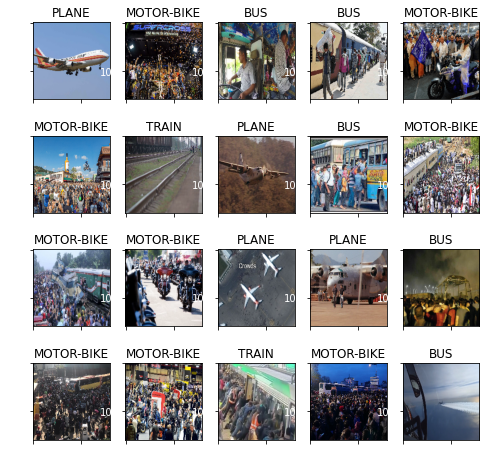

In [115]:
predict_images(test_ds.file_paths)


**EXTRA CHALLENGE**

In [116]:
%%bash
pip install tf-explain -q

In [117]:
x_test, y_test = test_ds.map(lambda x, y: (preprocess_input(x), y)).as_numpy_iterator().next()

x_test.shape, y_test.shape 

((20, 160, 160, 3), (20,))

In [118]:
from tf_explain.core.grad_cam import GradCAM


base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape=(160,160,3))
data = (x_test,None)   

explainer = GradCAM() 
grid = explainer.explain(data, base_model,class_index=0)  # 281 is the tabby cat index in ImageNet

explainer.save(grid, ".", "extra_challenge.png") 

In [119]:
ls

extra_challenge.png  gdrive/  sample_data/


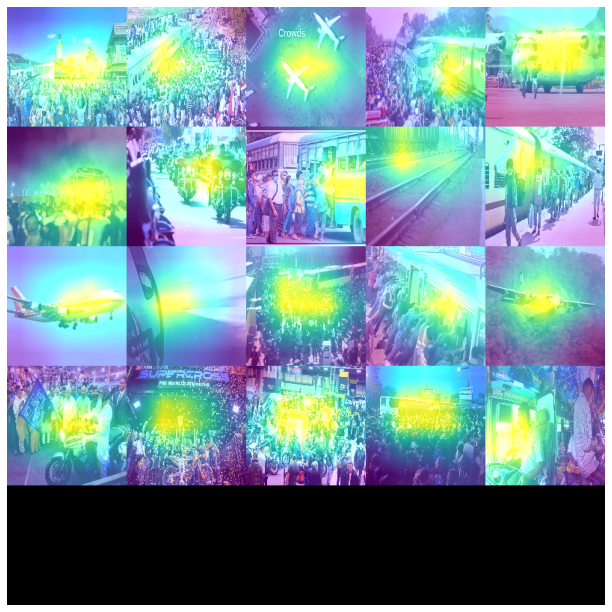

In [120]:
plt.figure(figsize=(11,11))
plt.imshow(grid.astype("uint8"))
plt.axis('off')
plt.show()